<a href="https://colab.research.google.com/github/betr0dalf/TIMO/blob/main/TIMO_NovikovDV_prac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Технологии и инструментарий машинного обучения
# Практическая работа № 2
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

# Шаг №1
Загрузка данных. Загрузите датасет, содержащий числовые признаки (например, Boston Housing, California Housing или другой подходящий из UCI или Kaggle). Импортируйте необходимые библиотеки для работы с данными, визуализацией и анализом. Загрузите данные в DataFrame и просмотрите первые строки, чтобы ознакомиться с набором данных.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Загрузка данных
df, y = fetch_california_housing(return_X_y=True, as_frame=True)
df['MedHouseVal'] = y

# Просмотр первых строчек набора данных
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Шаг №2
Исследование корреляций. Постройте корреляционную матрицу для числовых признаков. Визуализируйте корреляционную матрицу с помощью тепловой карты (heatmap). Определите пары признаков с наибольшей и наименьшей корреляцией. Для этого найдите максимальные и минимальные значения в корреляционной матрице, исключив диагональные элементы.

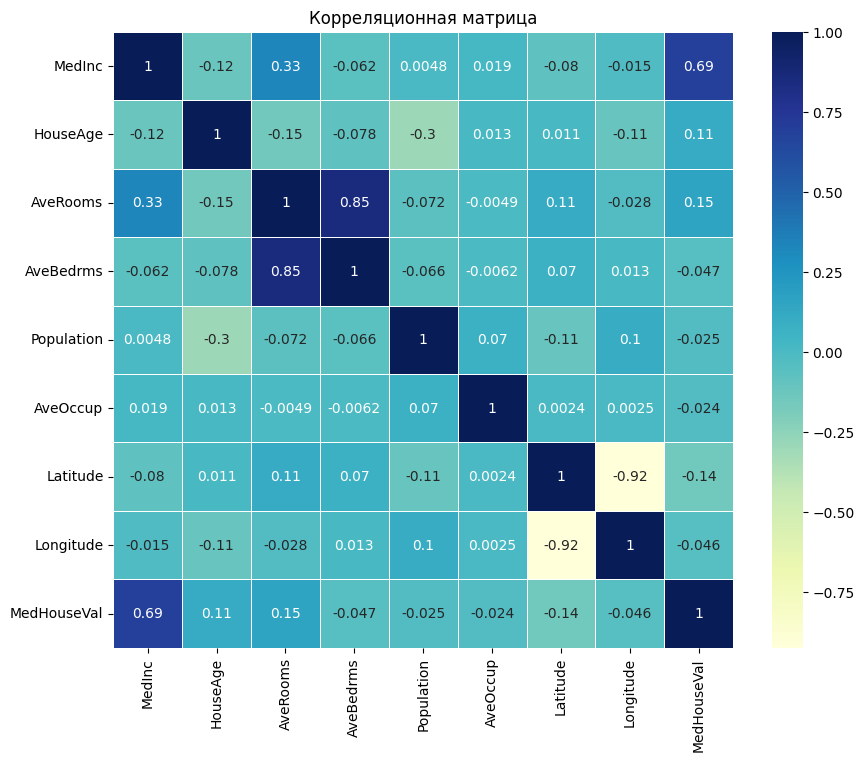

In [ ]:
# Вычисление корреляционной матрицы
corr_matrix = df.corr()

# Построение heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

***Максимальное значение*** значение в корреляционной матрице наблюдается между признаками *AveBedrms* и *AveRooms*, что свидетельствует о прямой зависимости и сильной корреляции.

***Минимальное значение*** в корреляционной матрице наблюдается между признаками *Longitude* и *Latitude*, что свидетельствует об обратной зависимости и сильной корреляции.

# Шаг №3
Построение графиков зависимостей. Выберите два признака с сильной корреляцией. Замените на реальные названия признаков из вашего датасета. Постройте диаграмму рассеяния (scatter plot) и добавьте линию регрессии.

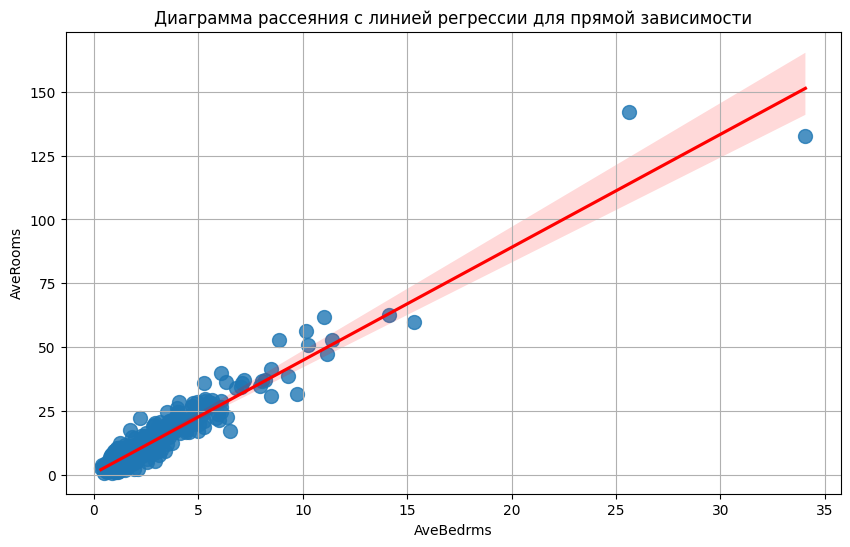

In [ ]:
# Построение диаграммы рассеяния с линией регрессии
plt.figure(figsize=(10, 6))
sns.regplot(x=df['AveBedrms'], y=df['AveRooms'], scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('Диаграмма рассеяния с линией регрессии для прямой зависимости')
plt.xlabel('AveBedrms')
plt.ylabel('AveRooms')
plt.grid(True)
plt.show()

# Шаг №4
Подготовка данных. Нормализуйте данные, чтобы привести все признаки к одному масштабу, используя стандартное масштабирование. Разделите данные на обучающую и тестовую выборки в пропорции 80/20.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Нормализация для Min-Max Scaling
scaler = MinMaxScaler()
df_scaled =  pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638


# Шаг №5
Визуализация трендов. Используйте модель линейной регрессии для предсказания и постройте график распределения ошибок между предсказанными и реальными значениями. Постройте график ошибок (выбросов), чтобы оценить точность модели.

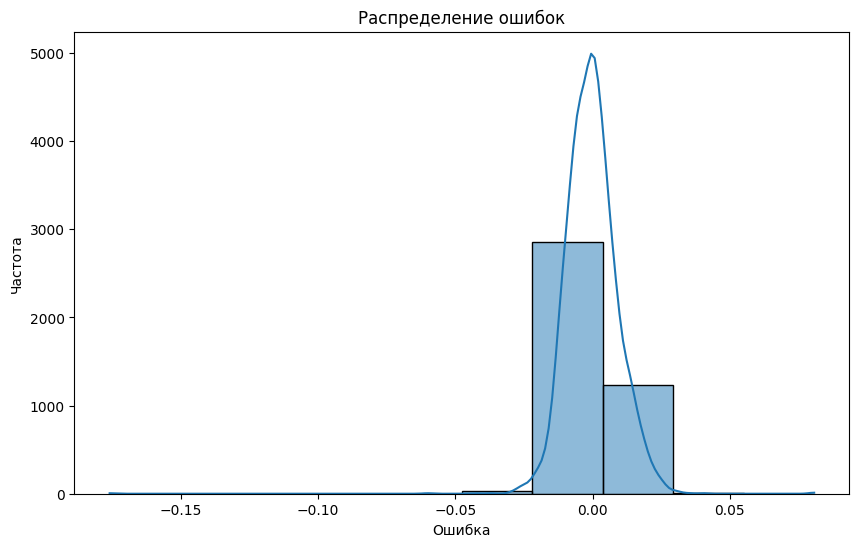

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и тестовую выборки в пропорции 80/20
X = df_scaled[['AveBedrms']]
y = df_scaled['AveRooms']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание модели
y_pred = model.predict(X_test)

# Вычисление ошибок
errors = y_test - y_pred

# Построение графика распределения ошибок
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=10)
plt.title('Распределение ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.show()

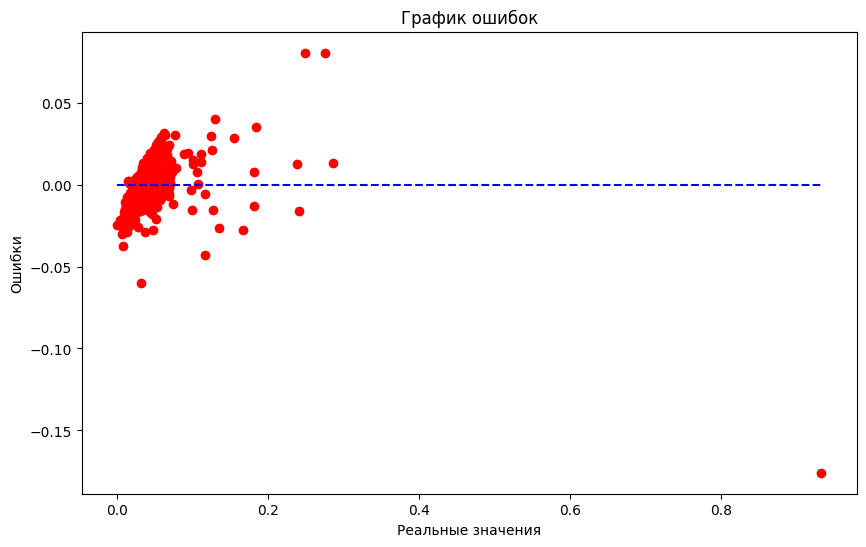

In [ ]:
# Построение графика ошибок (выбросов)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, color='red')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='blue', linestyles='dashed')
plt.title('График ошибок')
plt.xlabel('Реальные значения')
plt.ylabel('Ошибки')
plt.show()

In [ ]:
# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse}')

Среднеквадратичная ошибка (MSE): 9.028086817838633e-05


# Шаг №6
Ответьте на вопросы:

1) Как изменение одного признака влияет на другой?


2) Как влияет масштабирование данных на качество модели?

1) Изменение одного признака влияет на другой в зависимости от значения корреляции между ними. Чем выше корреляция, тем сильнее изменение одного признака может влияет на другой.

2) Масштабирование данных улучшает качество модели, ускоряет работу алгоритмов и предотвращает доминирование крупных признаков, что снижает риск переобучения.